# **Application de la classification**

La classification est une technique d'apprentissage supervisé qui consiste à attribuer des catégories ou des étiquettes à des données en fonction de leurs caractéristiques. Contrairement à la régression, qui prédit des valeurs continues, la classification vise à prédire une classe discrète. Les algorithmes de classification les plus courants incluent KNN,les arbres de decisions et les forêts aléatoires.

## **0. Imports**

In [264]:
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## **1. Charger les données**

Pour cet atelier, nous utiliserons un ensemble de données scikit-learn nommé **_Wisconsin Breast Cancer dataset_**. Il enregistre des mesures cliniques des tumeurs du sein. Chaque tumeur est étiquetée comme _"bénigne"_ ou _"maligne"_ et l'objectif est d'apprendre à prédire si une tumeur est maligne en fonction des mesures du tissu.

In [296]:
cancer = load_breast_cancer()
print("cancer.keys(): \n",(cancer.keys()))

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [266]:
data=cancer['data']
data.shape # nombre de lignes et de colonnes

(569, 30)

In [267]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [268]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [269]:
X,y=cancer['data'],cancer['target']

In [270]:
X.shape, y.shape

((569, 30), (569,))

In [271]:
for value, count in zip(cancer['target_names'],  np.bincount(cancer['target'])):
    print(f"{value} occurs {count} times")

malignant occurs 212 times
benign occurs 357 times


In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25) # separer le dataset en entrainnement et test
X_train.shape,y_train.shape

((426, 30), (426,))

In [273]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

## **2. KNN**

In [274]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [275]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [276]:
knn_pred = knn_model.predict(X_test)

In [277]:
print("KNN Exactitude:", accuracy_score(y_test, knn_pred))

KNN Exactitude: 0.9370629370629371


In [278]:
print("\nKNN Rapport de Classification:\n", classification_report(y_test, knn_pred))


KNN Rapport de Classification:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.94      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [279]:
COLOR="#3ade86"
def cm(model_name, predictions):
    disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=cancer.target_names,cmap='YlGn')
    disp.ax_.set_title(f"{model_name} Matrice de Confusion")
    plt.show()

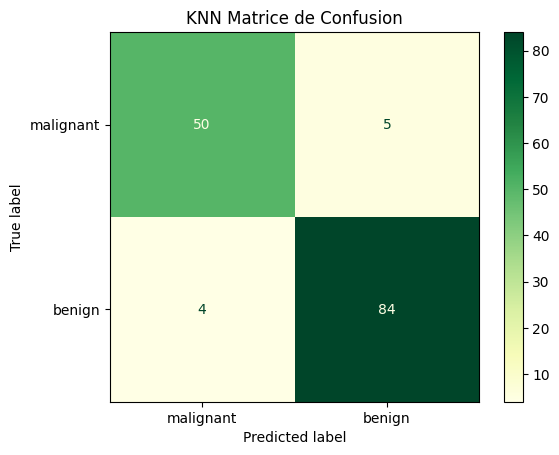

In [280]:
cm("KNN", knn_pred)


## **3. Arbres de decisions**

In [281]:
dt_model = DecisionTreeClassifier(random_state=42,criterion="entropy", max_depth=4)

In [282]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [283]:
dt_pred = dt_model.predict(X_test)

In [284]:
print("Arbres de Decision Exactitude:", accuracy_score(y_test, dt_pred))

Arbres de Decision Exactitude: 0.9440559440559441


In [285]:
print("\n Arbres de Decision Rapport de Classification:\n", classification_report(y_test, dt_pred))


 Arbres de Decision Rapport de Classification:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92        55
           1       0.93      0.98      0.96        88

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



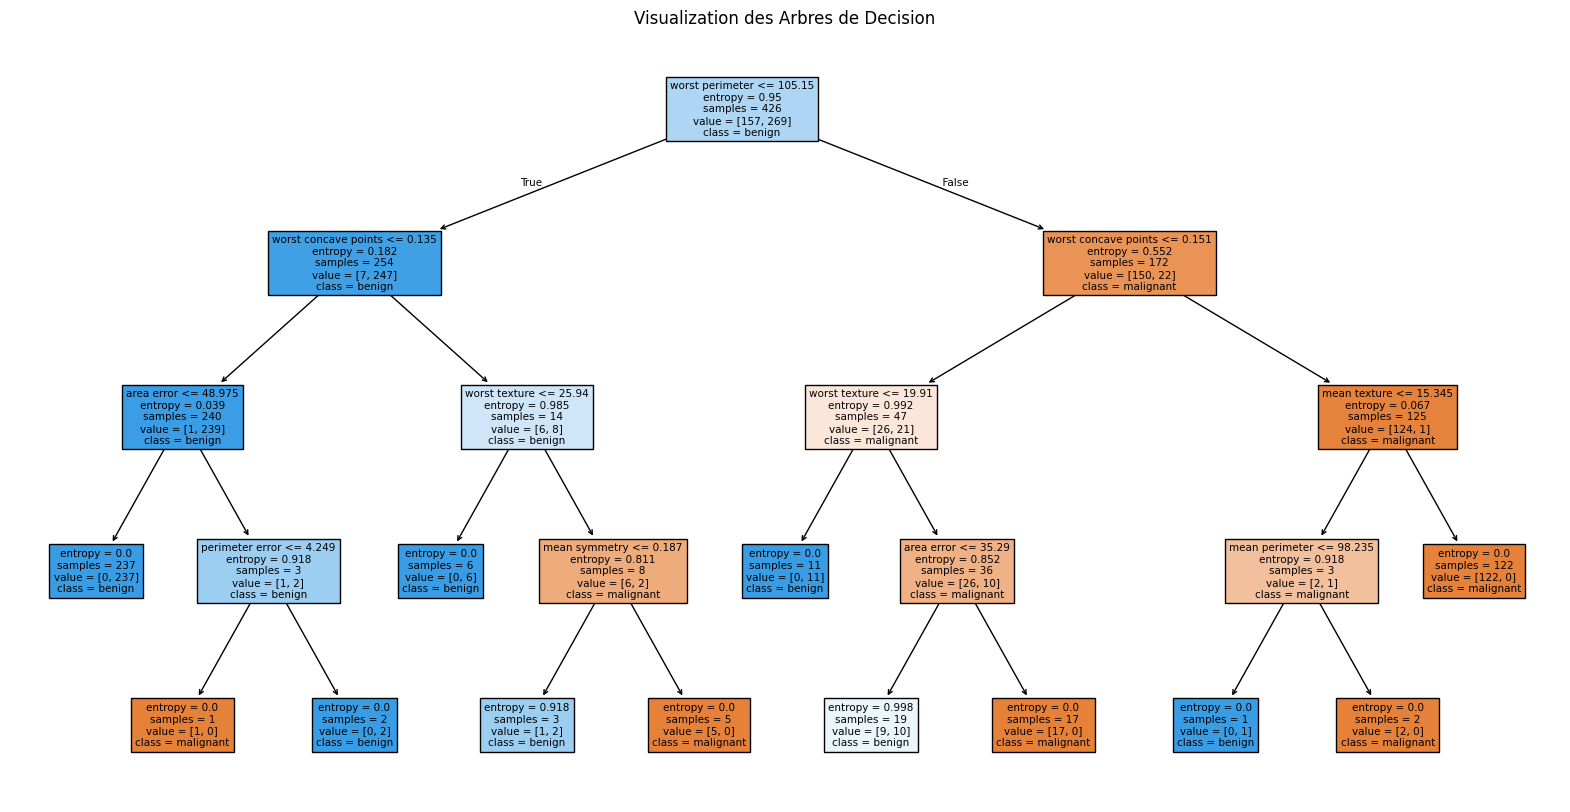

In [287]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.title("Visualization des Arbres de Decision")
plt.show()

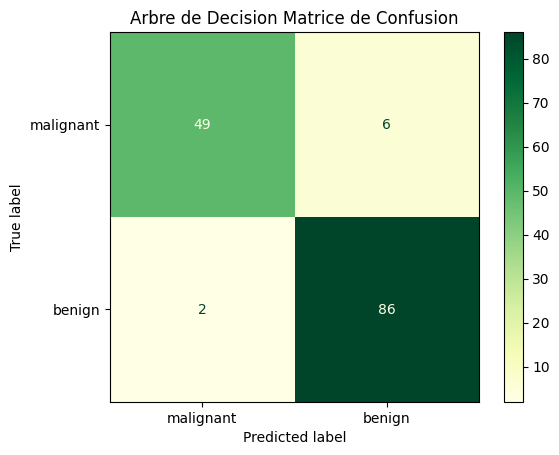

In [288]:
cm("Arbre de Decision",dt_pred )

## **4. Foret Aléatoire**

In [289]:
rf_model = RandomForestClassifier(random_state=42,n_estimators=15)

In [290]:

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [291]:

rf_pred = rf_model.predict(X_test)

In [292]:

print("Exactitude Forest aleatoire:", accuracy_score(y_test, rf_pred))

Exactitude Forest aleatoire: 0.951048951048951


In [293]:
print("\nForest aleatoire Rapport de Classification:\n", classification_report(y_test, rf_pred))


Forest aleatoire Rapport de Classification:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.95      0.98      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



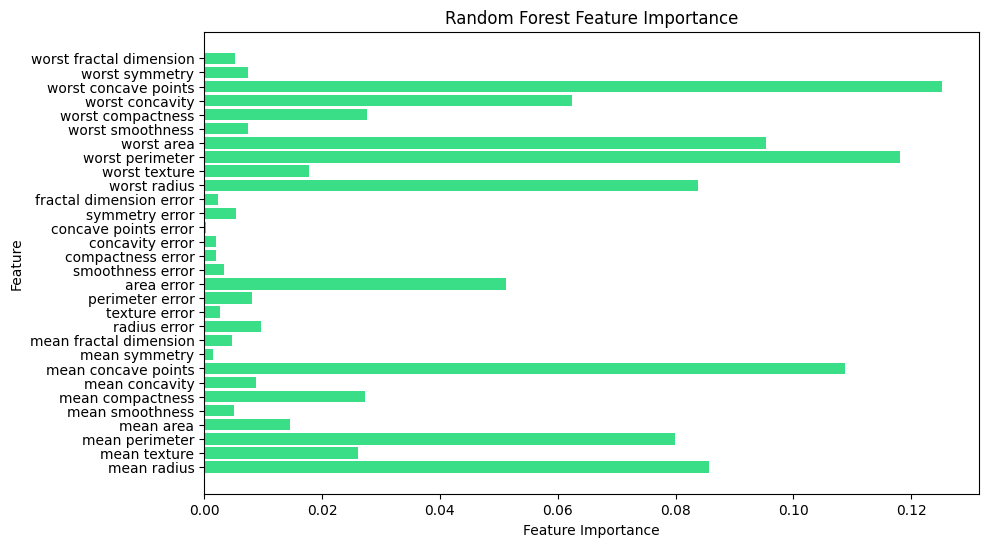

In [294]:
# Visualization: Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(cancer.feature_names, rf_model.feature_importances_,color=COLOR)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

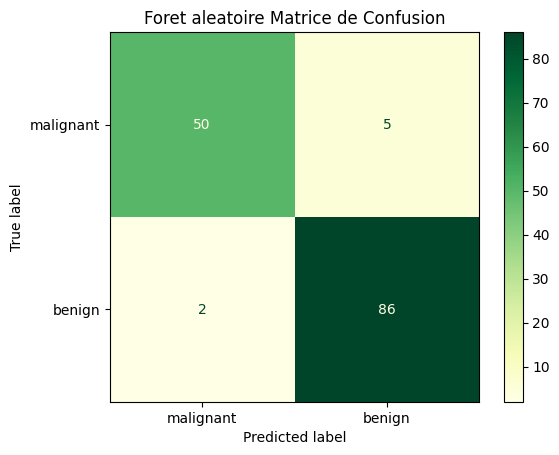

In [295]:
cm("Foret aleatoire", rf_pred)
